In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/jenny.jpg')
img.shape

(1600, 900, 3)

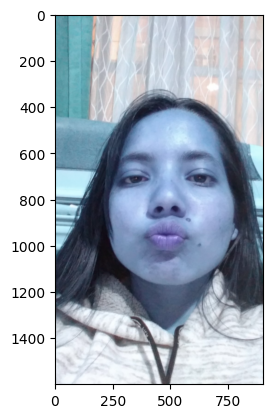

In [3]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1600, 900)

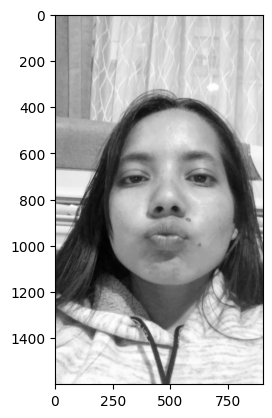

In [8]:
plt.imshow(gray ,cmap ='gray')

In [7]:
gray


array([[155, 155, 155, ..., 208, 209, 210],
       [154, 154, 155, ..., 207, 209, 210],
       [153, 153, 154, ..., 207, 209, 209],
       ...,
       [227, 228, 228, ..., 245, 245, 245],
       [228, 229, 230, ..., 245, 245, 245],
       [227, 229, 230, ..., 244, 244, 244]], dtype=uint8)

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[159, 446, 681, 681]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(159, 446, 681, 681)

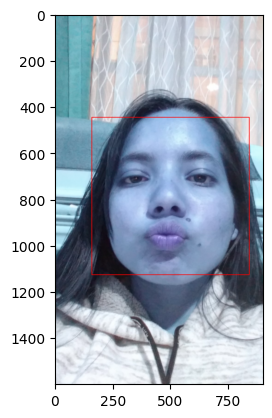

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

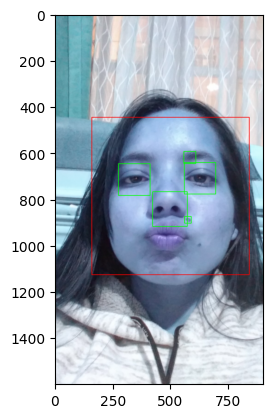

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

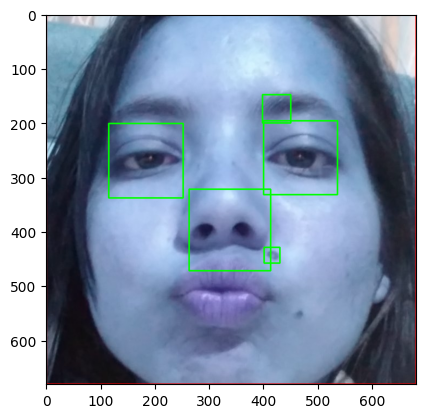

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')


In [39]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

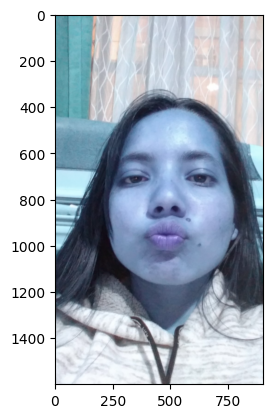

In [15]:
original_image = cv2.imread('./test_images/jenny.jpg')
plt.imshow(original_image)

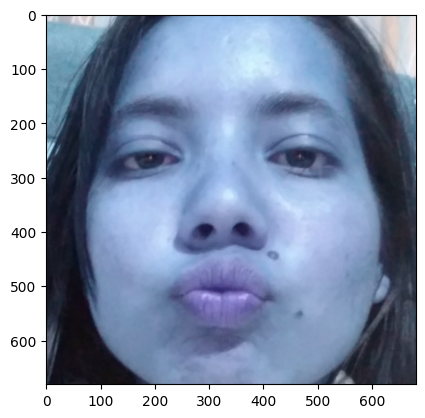

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/jenny.jpg')
plt.imshow(cropped_image)

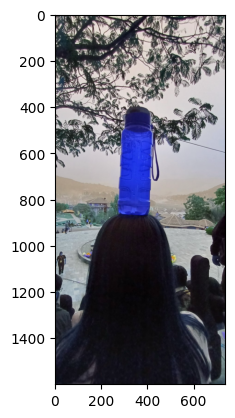

In [31]:
org_image_obstructed = cv2.imread('./test_images/jen.jpg')
plt.imshow(org_image_obstructed)

In [32]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/jen.jpg')
cropped_image_no_2_eyes

In [33]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [34]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [35]:
img_dirs

['./dataset/jenny', './dataset/rishi', './dataset/rupak']

In [36]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [51]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

jenny
rishi
rupak
